In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Analisis de componentes principales
from sklearn.decomposition import PCA, IncrementalPCA

# Clasificador lineal
from sklearn.linear_model import LogisticRegression

# Escalador para normalizar datos
from sklearn.preprocessing import StandardScaler

# Division de datos
from sklearn.model_selection import train_test_split

In [2]:
dt_heart = pd.read_csv('./datasets/heart.csv')
dt_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
dt_features = dt_heart.drop(['target'], axis=1)
dt_target = dt_heart['target']

# Normalizamos datos
dt_features = StandardScaler().fit_transform(dt_features)

# Partimos conjunto de entrenamiento
x_train, x_test, y_train, y_test = train_test_split(
    dt_features,
    dt_target,
    test_size=0.3,
    random_state=41
)
print('Datos X: ', x_train.shape)
print('Datos y: ', y_train.shape)

Datos X:  (717, 13)
Datos y:  (717,)


In [13]:
# n_components = min(n_muestras, n_features) // default
pca = PCA(n_components=3)
pca.fit(x_train, y_train)

# Entrena por bloques no con todos los datos a la vez
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(x_train, y_train)

IncrementalPCA(batch_size=10, copy=True, n_components=3, whiten=False)

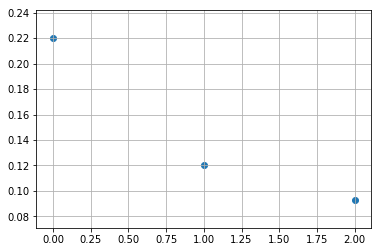

In [16]:
plt.scatter(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.grid(True)
plt.show()

### Vemos que las dos primeras componentes son las que mas información aportan.  Ahora configuraremos la regresión logística para comparar.

In [19]:
logistic = LogisticRegression(solver='lbfgs')

## Debemos aplicar pca en el conjunto de entrenamiento y en el de pruebas
dt_train = pca.transform(x_train)
dt_test = pca.transform(x_test)

logistic.fit(dt_train, y_train)

## Calculemos metricas para comparar
print(f'Score PCA: {logistic.score(dt_test, y_test)}')

## Ahora lo mismo pero con ipca
dt_train = ipca.transform(x_train)
dt_test = ipca.transform(x_test)

logistic.fit(dt_train, y_train)

## Calculemos metricas para comparar
print(f'Score IPCA: {logistic.score(dt_test, y_test)}')


Score PCA: 0.8214285714285714
Score IPCA: 0.8181818181818182
